In [1]:
import numpy as np
import matplotlib.pyplot as plt

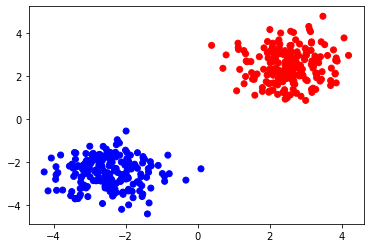

In [95]:
n_points = 200
x = np.concatenate(( np.random.multivariate_normal([-2,-2], [[0.5,0],[0,0.5]], n_points) ,  
                     np.random.multivariate_normal([3,3], [[0.5,0],[0,0.5]], n_points),
                ))
x = x-x.mean()
y = np.concatenate( (np.ones(n_points), -np.ones(n_points)) ).reshape(2*n_points, 1)
colors = np.ndarray.flatten(np.where(y==1,'b','r'))

plt.scatter(x[:,0], x[:,1], color= colors)

In [120]:
lr = 1e-2
lambda_= 1e-1
tol=1e-5
epoch = 1000

(_, n_features) = x.shape
w = np.random.rand(1,n_features)
g = lambda w, x: np.matmul(x,w.T)

In [121]:
weights = [w]
for e in range(epoch):
    
    fx = g(w, x)
    mask = (y*fx <= 1) + 0.

    cose = y*np.maximum(0, fx)
    dw = lambda_*w/x.shape[0] + np.mean( -y*x*mask, axis=0 )
    w = w - lr*dw
    
    if e%10==0:
        weights.append(w)
        if np.linalg.norm(weights[e//10+1] - weights[e//10]) <= tol : break
    
xs_id = list( abs(np.dot(x,w.T))).index( np.min( abs(np.dot(x,w.T) ) ))
b = y[xs_id] - np.dot(x[xs_id],w.T)
print(w, b)

[[-0.44581919 -0.3964015 ]] [0.11881873]


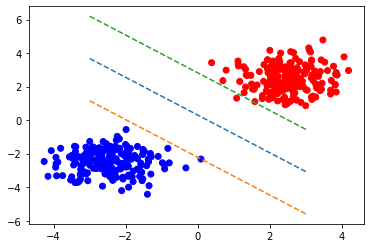

In [122]:
plt.plot(np.linspace(-3,3,30), -w.T[0]/w.T[1]*np.linspace(-3,3,30)-b/w.T[1], ls='--')
plt.plot(np.linspace(-3,3,30), -w.T[0]/w.T[1]*np.linspace(-3,3,30)-b/w.T[1]+1/w.T[1], ls='--')
plt.plot(np.linspace(-3,3,30), -w.T[0]/w.T[1]*np.linspace(-3,3,30)-b/w.T[1]-1/w.T[1], ls='--')
plt.scatter(x[:,0], x[:,1], color= colors) #I took mean, the update is mitigated

In [79]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x, y.reshape(400,))
y_pred_sk = svclassifier.predict(x)

In [80]:
print( svclassifier.coef_, svclassifier.intercept_)

[[-0.33704341 -0.45391914]] [-0.01051496]


In [81]:
from scipy.optimize import minimize
y = np.ndarray.flatten(y)
alpha_0 = np.ones(y.shape[0])

def loss(alpha):
    yy = np.einsum('i,j->ij',y, y.T)
    aa = np.einsum('i,j->ij',alpha, alpha.T)
    xx = np.einsum('ij,jk->ik',x, x.T)
    return -np.sum(alpha) + 0.5*np.sum(yy*xx*aa)

eq_cons = {
    "type" : "eq",
    "args" : (y,),
    "fun" : lambda alpha,y: np.sum( alpha*y )
}

res = minimize( loss, 
                alpha_0, 
                constraints=eq_cons, 
                bounds=((0.0, 5000), )*alpha_0.shape[0],
                method='SLSQP')

In [82]:
w = np.sum((res.x*y).reshape(400,1)*x, axis=0)

xs_id = list( abs(np.dot(x,w.T) )).index( np.min( abs(np.dot(x,w.T) ) ))
b = y[xs_id] - np.dot(x[xs_id],w.T)

print(w, b)

[-0.3370434  -0.45391913] -0.01051499758401131


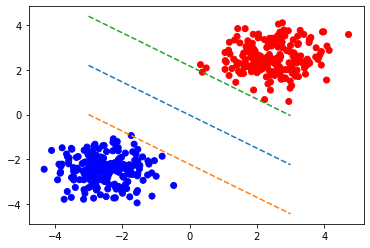

In [83]:
plt.plot(np.linspace(-3,3,30), -w[0]/w[1]*np.linspace(-3,3,30)-b/w[1], ls='--')
plt.plot(np.linspace(-3,3,30), -w[0]/w[1]*np.linspace(-3,3,30)-b/w[1]+1/w[1], ls='--')
plt.plot(np.linspace(-3,3,30), -w[0]/w[1]*np.linspace(-3,3,30)-b/w[1]-1/w[1], ls='--')
plt.scatter(x[:,0], x[:,1], color= colors)

accuracy:  0.998


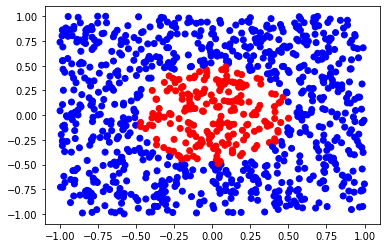

In [40]:
train_set = 2*np.random.rand(10000,2) - 1.
test_set  = 2*np.random.rand(1000,2) - 1.
train_label = np.sqrt( np.sum(train_set*train_set, axis=1) ) > 0.5
test_label  = np.sqrt( np.sum(test_set*test_set, axis=1) )   > 0.5

svclassifier = SVC(kernel='rbf')
svclassifier.fit(train_set, train_label)
y_pred_sk = svclassifier.predict(test_set)

colors = np.where(y_pred_sk==1,'b','r')
plt.scatter(test_set[:,0], test_set[:,1], color=colors)

acc = np.where(y_pred_sk==test_label,1,0)
print("accuracy: ", np.sum(acc)/len(acc))